## Problem 1
Переберите параметры с помощью GridSearchCV и обучите Random Forest на данных, указанных в предыдущем стэпе. Передайте в <code>GridSearchCV</code> модель с указанием random_state=0.

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import pandas as pd
import numpy as np

In [6]:
mush = pd.read_csv("../Datasets/training_mush.csv")
X = mush.drop('class', axis=1)
y= mush['class']

In [7]:
rf = RandomForestClassifier(random_state=0)

In [9]:
parameters = {'n_estimators':range(10,50,10), 'max_depth':range(1,13,2), 
              'min_samples_leaf':range(1,8), 'min_samples_split':range(2,10,2)}

In [17]:
grid_search_cv_rf = GridSearchCV(rf, parameters, cv=3, n_jobs=-1)

In [18]:
grid_search_cv_rf.fit(X,y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 50, 10)})

In [24]:
grid_search_cv_rf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

## Problem 2
Выберите правильные утверждения о важности фичей для нашего классификатора

In [25]:
rf_best = grid_search_cv_rf.best_estimator_

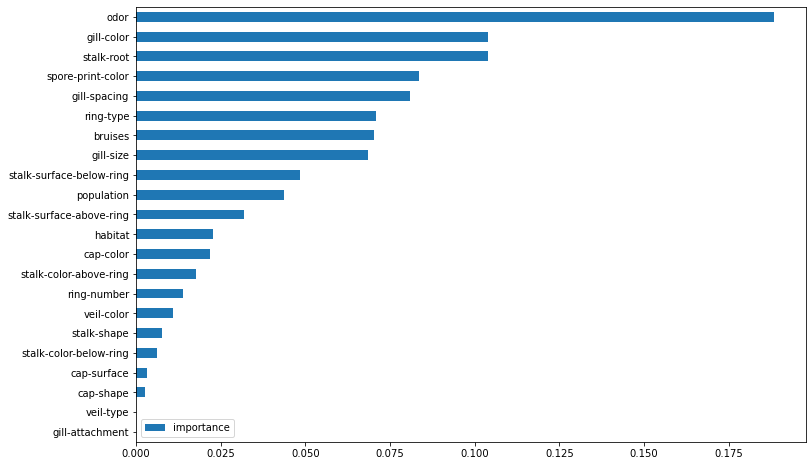

In [26]:
imp = pd.DataFrame(rf_best.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

## Problem 3
Теперь у нас есть классификатор, определяющий какие грибы съедобные, а какие нет, испробуем его! Предскажите съедобность этих ~~данных~~ [грибов](https://stepik.org/media/attachments/course/4852/testing_mush.csv) и напишите в ответ число несъедобных грибов (класс равен 1).

Заметьте, что для использования этого леса на новых грибах, нам нужно будет заполнить значения параметров гриба, часть из которых определить проще (например, цвет шляпки), а для определения части понадобится специалист-миколог.

То есть в этом случае нам придётся самим экстрагировать признаки из объекта. Для зрительных признаков типа формы, цвета можно использовать более сложную модель (например, свёрточную нейронную сеть) и подавать на вход фотки гриба. И модель сама извлечёт признаки вместо того, чтобы нам описывать самим. Но одной фоткой тут не отделаешься - для определения запаха понадобится ещё детектор

In [29]:
X_test = pd.read_csv("..//Datasets/testing_mush.csv")

In [32]:
rf_best.predict(X_test).sum()

976

## Problem 4
Создайте confusion matrix по предсказаниям, полученным вами в прошлом уроке и [правильным ответам](https://stepik.org/media/attachments/course/4852/testing_y_mush.csv.zip)

In [34]:
y_pred = rf_best.predict(X_test)
y_true = pd.read_csv("..//Datasets/testing_y_mush.csv")

In [35]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_pred)

array([[1055,    0],
       [   0,  976]])

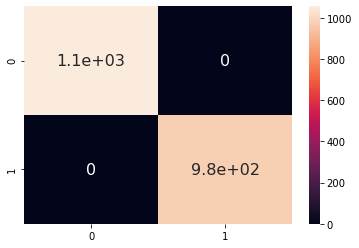

In [37]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_true, y_pred), annot=True,annot_kws={"size": 16})

## Problem 5
Перейдём к следующему [датасэту](https://stepik.org/media/attachments/course/4852/invasion.csv).

На Землю нападают войска жукеров, и в их флоте присутствуют транспортники, истребители и крейсеры. Для борьбы с каждым типом кораблей используется свой вид оружия. Как аналитику из Штаба Обороны, вам поручено разработать модель, предсказывающую какие корабли участвуют в атаке, чтобы успешно отбить нападения на различные области планеты

Данных удалось собрать немного, и предсказывать придётся гораздо больший по объёму массив.

Обучите модель и предскажите классы кораблей для [новых поступающих данных](https://stepik.org/media/attachments/course/4852/operative_information.csv). Укажите в ответе через пробел число крейсеров, транспортников и истребителей.

In [40]:
invasion = pd.read_csv("..//Datasets/invasion.csv")
operative_information = pd.read_csv("..//Datasets/operative_information.csv")

In [44]:
invasion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   class               500 non-null    object 
 1   g_reflection        500 non-null    float64
 2   i_reflection        500 non-null    float64
 3   speed               500 non-null    float64
 4   brightness          500 non-null    float64
 5   time_of_observance  500 non-null    int64  
 6   volume              500 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 27.5+ KB


In [53]:
invasion['class_int'] = pd.factorize(invasion['class'])[0]

In [56]:
invasion.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume,class_int
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446,0
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300,0
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467,0
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865,1
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806,1


In [58]:
X = invasion.drop(['class', 'class_int'], axis=1)
y = invasion.class_int

In [61]:
clf = DecisionTreeClassifier()

In [62]:
clf.fit(X,y)

DecisionTreeClassifier()

In [85]:
pd.Series(clf.predict(operative_information)).value_counts().sort_values()

2    230
0    595
1    675
dtype: int64

In [95]:
pd.DataFrame(clf.feature_importances_, index=X.columns, columns=['importance'])\
  .sort_values('importance', ascending=False)

,importance
volume,1.0
g_reflection,0.0
i_reflection,0.0
speed,0.0
brightness,0.0
time_of_observance,0.0


## Problem 6
Благодаря вашим стараниям войска захватчиков были разгромлены, но война ещё не окончена! Вас повысили и перевели на новое направление (новые должности - новые задачи) - теперь нужно выявлять опасные регионы космоса, где могут находиться жукеры.

Проанализируйте имеющиеся [данные](https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv) об опасности разных регионов космоса и укажите наиболее вероятные причины угрозы

In [102]:
dangerous = pd.read_csv("..//Datasets/space_can_be_a_dangerous_place.csv")
dangerous.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


In [104]:
X = dangerous.drop(['dangerous', 'dustiness', 'phi', 'r', 'peradventure_index'], axis=1)
y = dangerous.dangerous

In [105]:
clf.fit(X,y)

DecisionTreeClassifier()

In [106]:
pd.DataFrame(clf.feature_importances_, index=X.columns, columns=['importance'])\
  .sort_values('importance', ascending=False)

,importance
buggers_were_noticed,0.554931
nearby_system_has_planemo,0.427127
black_hole_is_near,0.017943
